In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
cwd = os.getcwd()

ROOT = os.path.join(cwd, '../')
DATA_FOLDER = os.path.join(ROOT, 'data/')

df = pd.read_pickle(os.path.join(DATA_FOLDER, 'saeb_treated.pkl'))

df = df.dropna()
print(len(df))
df.head()

50356


,ano,sigla_uf,escola_publica,id_aluno,situacao_censo,disciplina,proficiencia,erro_padrao,proficiencia_saeb,erro_padrao_saeb,...,frequenta_festas_comunidade,gosta_estudar_disciplina,faz_licao_casa,correcao_licao_casa,utiliza_biblioteca_escola,rede,id_escola,serie,turno,desempenho_aluno_cat
27111,2015,PB,1,17523018,0,MT,-0.627672,0.648351,214.882332,36.237847,...,1.0,0.0,1.0,1.0,1.0,2,25083490,9,3,0
27112,2015,PB,1,17491737,0,LP,-1.027257,0.354996,193.389947,19.557923,...,2.0,1.0,2.0,2.0,2.0,2,61134907,9,1,0
27115,2015,PB,1,17491737,0,MT,-0.807123,0.639382,204.852398,35.736548,...,2.0,1.0,2.0,2.0,2.0,2,61134907,9,1,0
27122,2015,PB,1,17488937,0,LP,-0.341425,0.380753,231.174739,20.976963,...,1.0,1.0,2.0,2.0,1.0,2,25027573,9,1,1
27123,2015,PB,1,17488937,0,MT,-0.906444,0.545208,199.301116,30.472944,...,1.0,1.0,2.0,2.0,1.0,2,25027573,9,1,0


In [59]:
#df = df[df['disciplina'] == 'LP']
#print(len(df))

In [60]:
mediana = df['proficiencia'].median()

df['target'] = df['proficiencia'].apply(lambda x: 1 if x >= mediana else 0)

In [61]:
df['target'].value_counts()

target
0    25178
1    25178
Name: count, dtype: int64

In [62]:
df[['proficiencia', 'desempenho_aluno_cat']].describe()

,proficiencia,desempenho_aluno_cat
count,50356.000000,50356.000000
mean,-0.074268,0.968623
std,0.827571,0.738980
min,-2.458611,0.000000
25%,-0.660181,0.000000
50%,-0.082109,1.000000
75%,0.502889,1.000000
max,3.214629,3.000000


In [63]:
print(df.columns)

Index(['ano', 'sigla_uf', 'escola_publica', 'id_aluno', 'situacao_censo',
       'disciplina', 'proficiencia', 'erro_padrao', 'proficiencia_saeb',
       'erro_padrao_saeb', 'desempenho_aluno', 'sexo', 'raca_cor',
       'ano_nascimento', 'idade', 'escolaridade_mae', 'mae_sabe_ler_escrever',
       'mae_le', 'escolaridade_pai', 'pai_sabe_ler_escrever', 'pai_le',
       'responsaveis_incentivam_realizacao_licao_casa',
       'responsaveis_incentivam_estudos', 'responsaveis_incentivam_leitura',
       'responsaveis_incentivam_comparecer_aulas', 'possui_computador',
       'tempo_lazer', 'leitura_jornais', 'leitura_livros_geral',
       'leitura_literatura_infantojuvenil', 'leitura_historia_quadrinhos',
       'leitura_revista_comportamento', 'leitura_revistas_geral',
       'leitura_internet', 'frequenta_biblioteca', 'frequenta_cinema',
       'frequenta_espetaculo_exposicao', 'frequenta_festas_comunidade',
       'gosta_estudar_disciplina', 'faz_licao_casa', 'correcao_licao_casa',
     

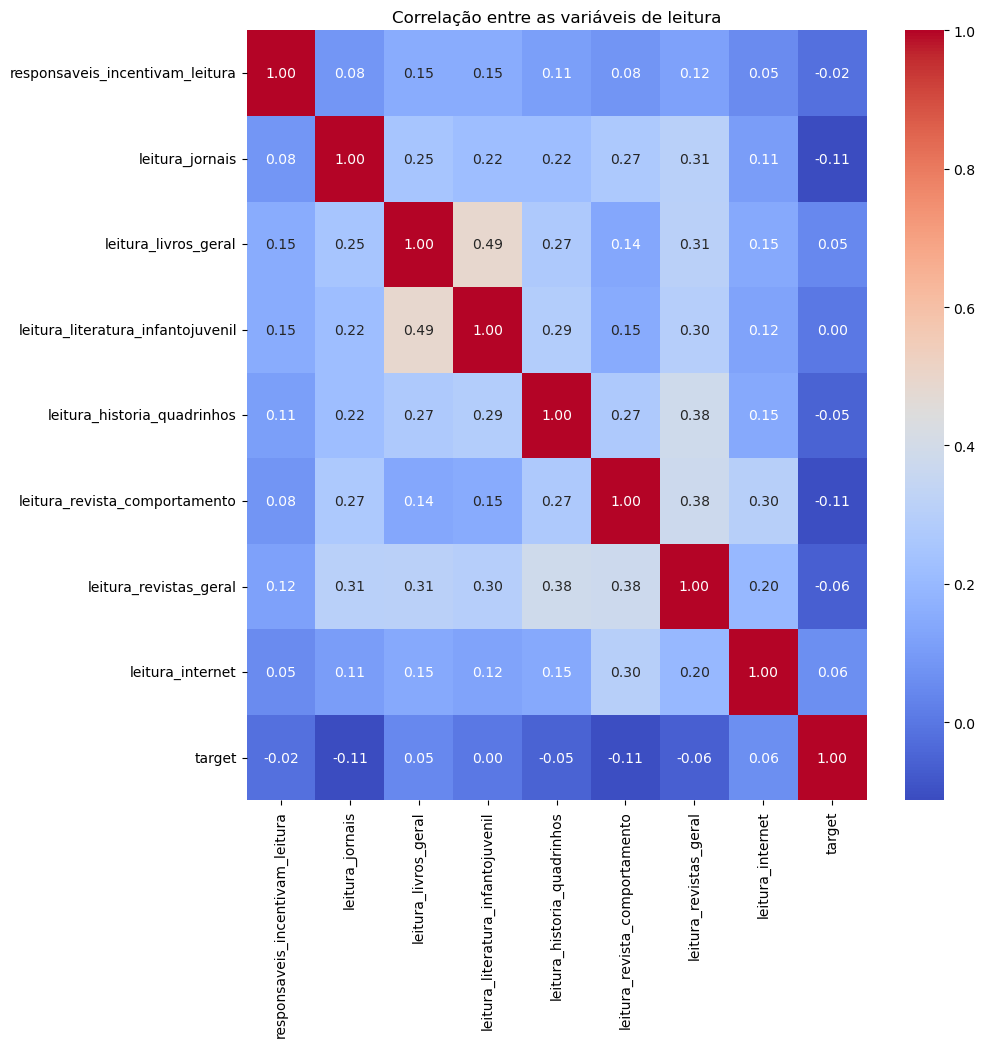

In [64]:
# selecionando colunas de leitura
columns_oi = [col for col in df.columns if 'leitura' in col] + ['target']

# correlação entre as colunas
correlation = df[columns_oi].corr()

# plotando o heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlação entre as variáveis de leitura')
plt.show()

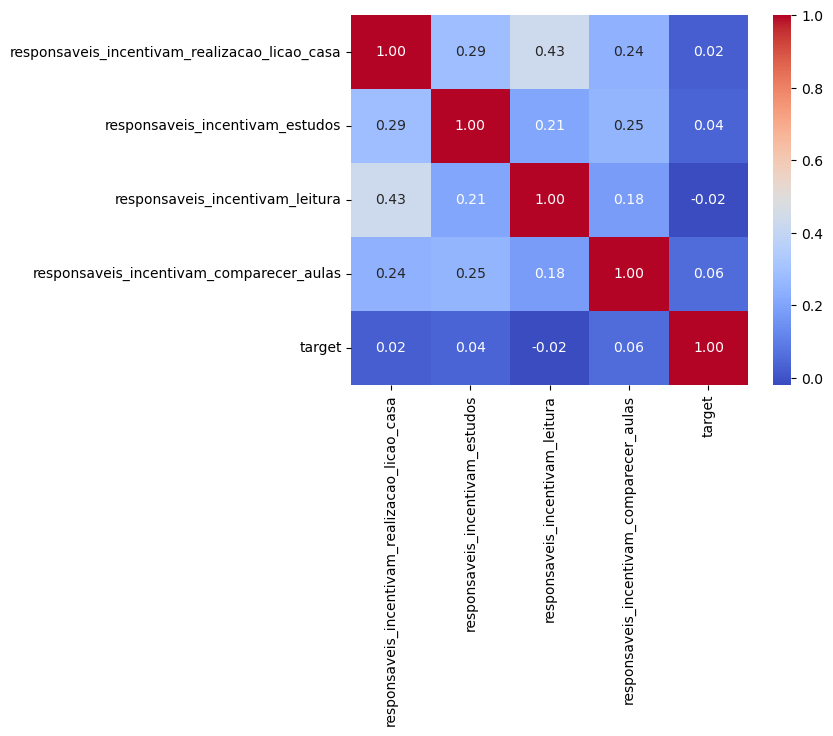

<Figure size 1000x1000 with 0 Axes>

In [65]:
# colunas responsaveis_

columns_oi = [col for col in df.columns if 'responsaveis_' in col] + ['target']

corr = df[columns_oi].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.figure(figsize=(10, 10))
plt.show()

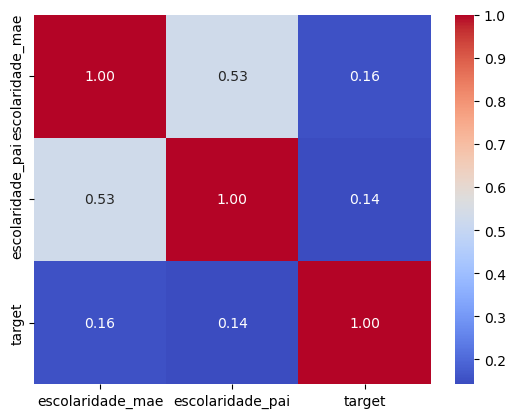

<Figure size 1000x1000 with 0 Axes>

In [66]:
# colunas de escolaridade_mae e escolaridade_mae

columns_oi = [col for col in df.columns if 'escolaridade_mae' in col or 'escolaridade_pai' in col] + ['target']

corr = df[columns_oi].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.figure(figsize=(10, 10))
plt.show()

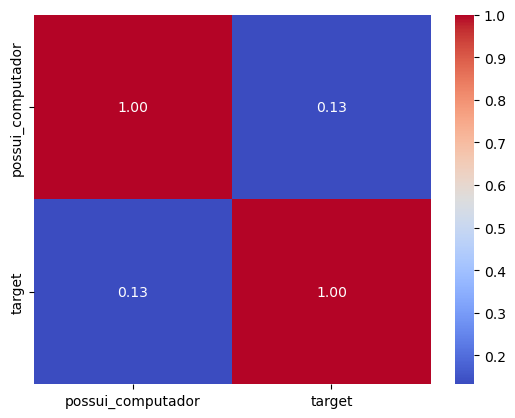

<Figure size 1000x1000 with 0 Axes>

In [67]:
# coluna possui_computador

columns_oi = [col for col in df.columns if 'possui_computador' in col] + ['target']

corr = df[columns_oi].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.figure(figsize=(10, 10))
plt.show()

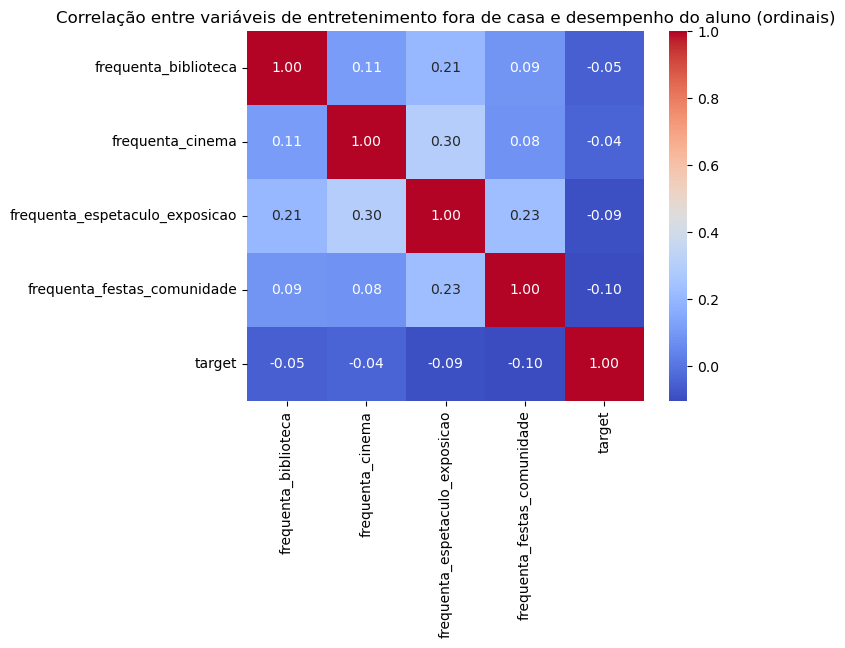

<Figure size 1000x1000 with 0 Axes>

In [68]:
# colunas 'frequenta_'

columns_oi = [col for col in df.columns if 'frequenta_' in col] + ['target']

corr = df[columns_oi].corr()
plt.title('Correlação entre variáveis de entretenimento fora de casa e desempenho do aluno (ordinais)')
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.figure(figsize=(10, 10))
plt.show()

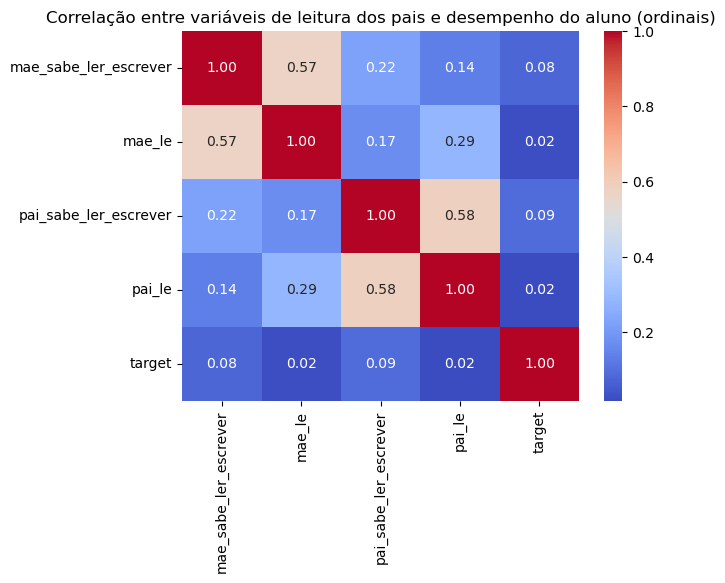

<Figure size 1000x1000 with 0 Axes>

In [69]:
# colunas de leitura dos pais (nível de escolaridade)

columns_oi = ['mae_sabe_ler_escrever', 'mae_le', 'pai_sabe_ler_escrever', 'pai_le'] + ['target']

corr = df[columns_oi].corr()
plt.title('Correlação entre variáveis de leitura dos pais e desempenho do aluno (ordinais)')
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.figure(figsize=(10, 10))
plt.show()

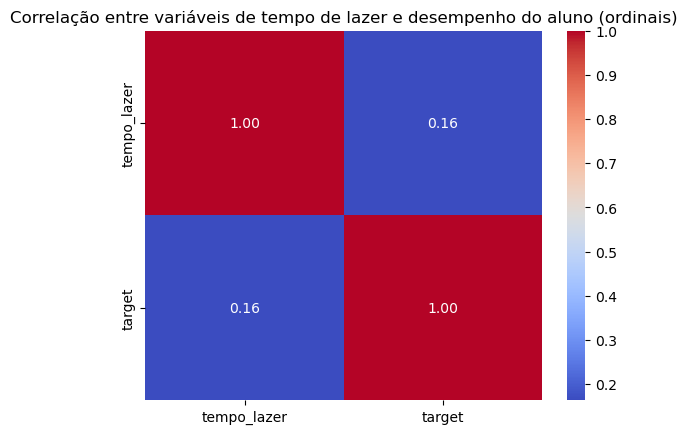

<Figure size 1000x1000 with 0 Axes>

In [70]:
columns_oi_lazer = [col for col in df.columns if 'tempo_' in col] + ['target']

corr = df[columns_oi_lazer].corr()
plt.title('Correlação entre variáveis de tempo de lazer e desempenho do aluno (ordinais)')
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.figure(figsize=(10, 10))
plt.show()

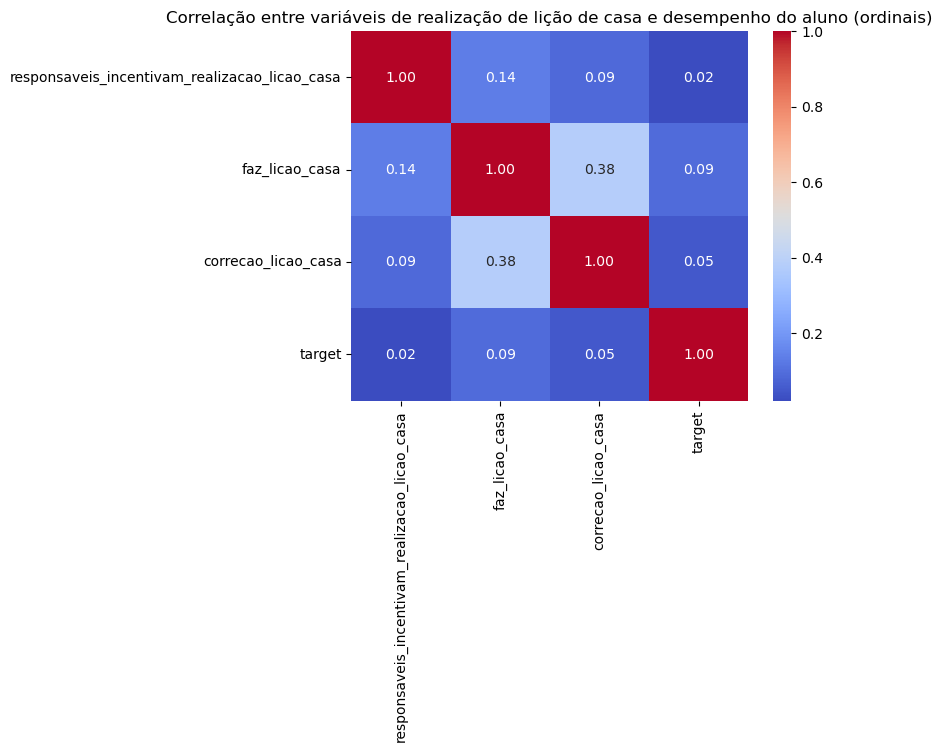

<Figure size 1000x1000 with 0 Axes>

In [71]:
columns_oi_licao = [col for col in df.columns if 'licao_casa' in col] + ['target']

corr = df[columns_oi_licao].corr()
plt.title('Correlação entre variáveis de realização de lição de casa e desempenho do aluno (ordinais)')
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.figure(figsize=(10, 10))
plt.show()

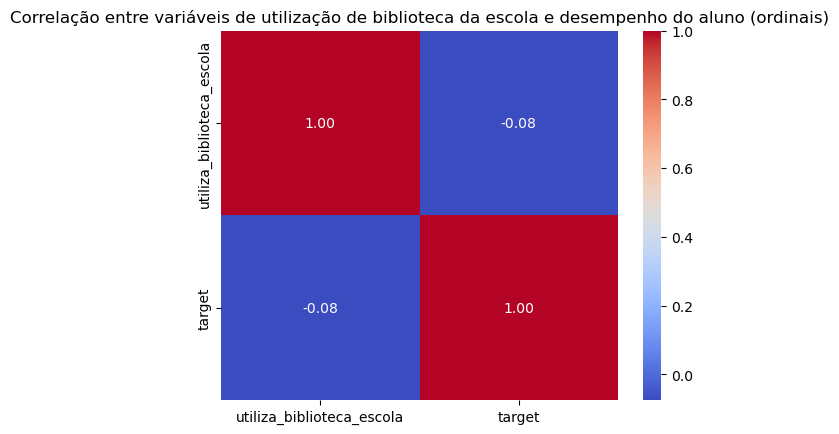

<Figure size 1000x1000 with 0 Axes>

In [72]:
columns_oi_bilioteca = [col for col in df.columns if 'utiliza_biblioteca_escola' in col] + ['target']

corr = df[columns_oi_bilioteca].corr()
plt.title('Correlação entre variáveis de utilização de biblioteca da escola e desempenho do aluno (ordinais)')
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.figure(figsize=(10, 10))
plt.show()

Index(['idade', 'gosta_estudar_disciplina', 'turno', 'desempenho_aluno_cat',
       'target'],
      dtype='object')


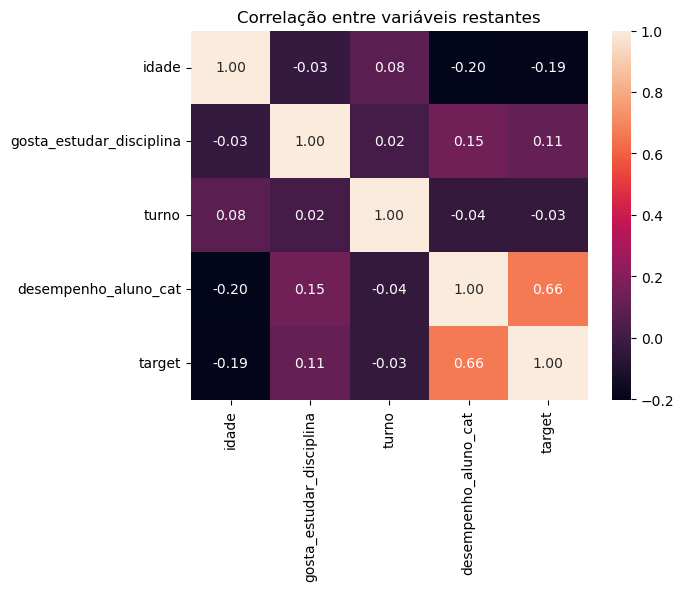

<Figure size 2000x2000 with 0 Axes>

In [73]:
# heatmap for columns relationship
exclude = ['ano', 'sigla_uf', 'escola_publica', 'id_aluno', 'situacao_censo',
       'disciplina', 'proficiencia', 'erro_padrao', 'proficiencia_saeb',
       'erro_padrao_saeb', 'desempenho_aluno', 'sexo', 'raca_cor',
       'ano_nascimento']

exclude += [col for col in df.columns if 'leitura_' in col]
exclude += [col for col in df.columns if 'responsaveis_' in col]
exclude += [col for col in df.columns if 'frequenta_' in col]
exclude += ['mae_sabe_ler_escrever', 'mae_le', 'pai_sabe_ler_escrever', 'pai_le']
#exclude += ['rede', 'id_escola', 'turno']
exclude += ['serie', 'rede', 'id_escola']
exclude += [col for col in df.columns if 'tempo_' in col]
exclude += [col for col in df.columns if 'faz_licao_casa' in col]
exclude += [col for col in df.columns if 'correcao_licao_casa' in col]
exclude += [col for col in df.columns if 'utiliza_biblioteca_escola' in col]
exclude += [col for col in df.columns if 'escolaridade_mae' in col or 'escolaridade_pai' in col]
exclude += ['possui_computador']

print(df.drop(exclude, axis=1).columns)

corr = df.drop(exclude, axis=1).corr()
plt.title('Correlação entre variáveis restantes')
sns.heatmap(corr, annot=True, fmt=".2f")
plt.figure(figsize=(20, 20))
plt.show()